**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab7.1](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab071/Lab071.ipynb)

___

# <font color=darkred>Laboratory 7.1: FILE it for later ...  </font>

**LAST NAME, FIRST NAME**

**R00000000**

ENGR 1330 Laboratory 7.1 - In-Lab

In [ ]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)


___

## Reading Files


---

## Example Reading a Data File to Build a Plot

Repeat the example below, except read the file from the remote server using script instructions (do not download manually)

In this example we will make a contour plot using data in a file at [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt)that 
The data in the file are organized as follows:

    160 240
    -3.0,-2.0,4.5206310380743785e-06
    -2.975,-2.0,5.248940670890073e-06
    -2.95,-2.0,6.086973208643232e-06
    -2.9250000000000003,-2.0,7.049985780998036e-06
    -2.9000000000000004,-2.0,8.155154929062083e-06
    ... many more rows
    
The first two entries are the row and column count of a rectangular region that we wish to plot the contours.  The remaining rows contain the x-,y-, and z-values.  The x and y values are the spatial locations where the z values are known.  There are a total of 38,400 records in the file - too big to manually enter.

The plotting package needs all the entries on a grid (dumb, but thats what it needs) so we need to read in the xyz data then manipultes it so that there are three 2D structures `X[160][240]`, `Y[160][240]`, and `Z[160][240]` these structures get sent to the contour plotting function.

**Step 0: <font color='red'>Download the data file to your machine!</font>**
- Right-click the link
- Save (target, link, file ...) as ... (This action will differ by machine, OS, and browser!) but goal is to get a copy of the file to your machine.  <!--[I can't make it work](https://www.depts.ttu.edu/rawlsbusiness/).-->
- Verify you have the file and it is readable (its supposed to be ASCII, so open in an editor and see if it kind of looks like the fragment above, possibly without line feeds

Our first step is to create space to hold the data, then open the file

In [2]:
#%reset -f # only if necessaryimport requests # Module to process http/https requests
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txt"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('gridded_data.txt','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [97]:
#### Reading a Data File ####
xyzmatrix = [] # null list to hold contents
xyzfile = open("gridded_data.txt","r") # open a read connection

Next we read the first line, and extract the row and column counts

In [98]:
line1 = (xyzfile.readline().split()) # read just the first line
rowNum = int(line1[0]) # extract row count
colNum = int(line1[1]) # extract column count

Next we read the remaining 38,000 lines

In [99]:
for line in xyzfile: # now read rest of the file, line by line
    xyzmatrix.append([float(n) for n in line.strip().split(",")])

So the read is complete, lets close the connection

In [100]:
xyzfile.close()

Now build the structures for plotting, as before we need to allocate space for the data, here we are using a constructor syntax to build matrices of zeros using implied loops.

In [101]:
#### Build 2D Structure for Contour Plot Example ####
xlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
ylist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
zlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents

Next we will populate the matrices (grids) from the xyzmatrix we just read into the notebook.  Notice how we create a counter to keep track of each row of the xyzmatrix and increment the counter as we build the grids.

In [102]:
pointer=0
for irow in range(0,rowNum): 
    for jcol in range(0,colNum):
        xlist[irow][jcol]=(xyzmatrix[pointer][0])
        ylist[irow][jcol]=(xyzmatrix[pointer][1])
        zlist[irow][jcol]=(xyzmatrix[pointer][2])
        pointer += 1

Now finally the plot - using a package called matplotlib which we will study later in the course.  For now use it as shown.

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

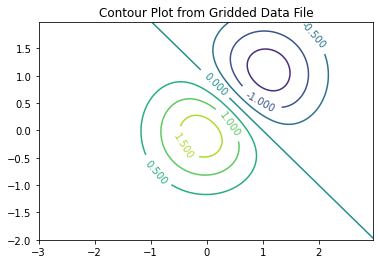

In [103]:
#### Build the Plot #####
import matplotlib
fig, ax = matplotlib.pyplot.subplots()
CS = ax.contour(xlist, ylist, zlist, levels = 7)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')
################################

___

1. Contour Plots [https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html](https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html)

---

## Example - Reading a Treasure Map

The treasure map problem was already presented, in this example we will replace the explicitly defined map lists with a file, allowing for the use of multiple maps.  Starting with our original map, but contained in a text file named [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt) we can read the map using file manipulation methods.

**Step 0: <font color='red'>Download the data file to your machine! using scripting</font>**

In [10]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
localfile = open('treasure2.txt','wb') # open connection to a local file same name as remote
localfile.write(rget.content) # extract from the remote the contents,insert into the local file same name
localfile.close() # close connection to the local file

In [11]:
treasuremap = [] # empty list to the map information
treasurefile = open("treasure2.txt","r") # open a read connection
for line in treasurefile:
    treasuremap.append([str(n) for n in line.strip().split(",")])
treasurefile.close()

Now we have the map, we can use list delete and slicing to remove un-necessary data

In [12]:
del treasuremap[0] #remove entire first row 
for irow in range(len(treasuremap)): #step through remaining rows
    del treasuremap[irow][0] #kill leading column each row

Now we can use our treasure map search to complete the example

In [13]:
#####################################
for i in range(0,5,1):
    what_to_print =','.join(map(repr, treasuremap[i][:]))
    print(what_to_print) # print the map by row
#### Complete Enumeration Search ####
for i in range(0,5,1): # visit the rows
    for j in range(0,5,1): # visit the columns
# get row and column from i and j values
        row = i+1
        column = j+1
# get maprowval and mapcolval
        maprowval = str(treasuremap[row-1][column-1])[0]
        mapcolval = str(treasuremap[row-1][column-1])[1]
# test if cell is a treasure cell or not
        if int(maprowval) == row and int(mapcolval) == column :
            print('Cell ',treasuremap[i][j], ' contains TREASURE ') # print the result
            found = True
            break
            pass #comment this line out when have message
        else:
            #print('Cell ',treasuremap[i][j], ' contains no treasure') # message here for no treasure
            found = False
            pass #comment this line out when have message
    if found: break # exit the search when find first treasure
if not found:
    print("no treasure found after searching all cells")

'55','14','25','52','21'
'44','31','11','53','43'
'24','13','45','12','34'
'42','22','43','32','41'
'51','23','33','54','15'
Cell  43  contains TREASURE 


---

## Exercise

Consider a new treasure map contained in file [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt).  Modify the program to use this map, and find ALL the treasures (there are two).

___

## References

1. List processing tips [https://www.programiz.com/python-programming/del](https://www.programiz.com/python-programming/del)

2. Character replacement tips [https://www.geeksforgeeks.org/python-string-replace/](https://www.geeksforgeeks.org/python-string-replace/)

3. Python file manipulations [https://www.tutorialspoint.com/python/python_files_io.htm](https://www.tutorialspoint.com/python/python_files_io.htm)

